In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn as sk
import sklearn.linear_model as slm
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split ## Higher Version 0.16.1

import os
print(os.listdir("../input"))



['housing.csv']


/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#data = pd.read_csv('housing.csv')
data = pd.read_csv('../input/housing.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data_refine = data.drop('ocean_proximity', axis = 1)

In [5]:
data_refine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
data_refine = data_refine.dropna(axis = 0)
data_refine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
longitude             20433 non-null float64
latitude              20433 non-null float64
housing_median_age    20433 non-null float64
total_rooms           20433 non-null float64
total_bedrooms        20433 non-null float64
population            20433 non-null float64
households            20433 non-null float64
median_income         20433 non-null float64
median_house_value    20433 non-null float64
dtypes: float64(9)
memory usage: 1.6 MB


In [7]:
X = data_refine.drop('median_house_value', axis = 1)
y = data_refine['median_house_value']

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 8 columns):
longitude             20433 non-null float64
latitude              20433 non-null float64
housing_median_age    20433 non-null float64
total_rooms           20433 non-null float64
total_bedrooms        20433 non-null float64
population            20433 non-null float64
households            20433 non-null float64
median_income         20433 non-null float64
dtypes: float64(8)
memory usage: 1.4 MB


In [9]:
print(y.shape)

(20433,)


Text(0,0.5,'House Price')

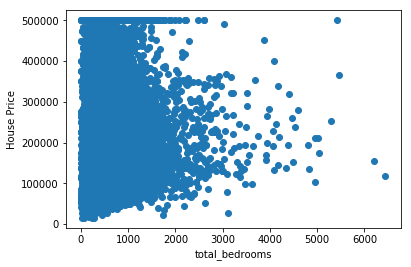

In [10]:
plt.scatter(X['total_bedrooms'], y)
plt.xlabel('total_bedrooms')
plt.ylabel('House Price')

In [11]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


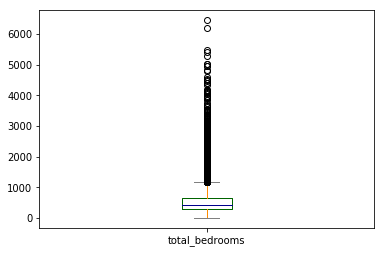

In [12]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
X['total_bedrooms'].plot.box(color=color)

In [13]:
LR = slm.LinearRegression()
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(15324, 8)
(15324,)
(5109, 8)
(5109,)


In [14]:
LR.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
predict = LR.predict(X_test)

In [16]:
print('Predicted Value :',predict[0])
print('Actual Value :',Y_test.values[0])

Predicted Value : 137848.253727091
Actual Value : 104900.0


In [17]:
LR.score (X_test, Y_test)

0.6214530650697923

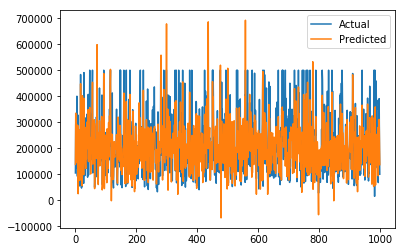

In [18]:
gr = pd.DataFrame({'Predicted':predict,'Actual':Y_test})
gr = gr.reset_index()
gr = gr.drop(['index'],axis=1)
plt.plot(gr[:1000])
plt.legend(['Actual','Predicted'])
#gr.plot.bar();